<a href="https://colab.research.google.com/github/KManvitha26/Dyslexia-Detection-and-Their-Inclusion-Needs/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score


In [ ]:
df=pd.read_csv('/content/data1cleaned_file.csv')

In [ ]:
def SeparateColumns(dataSetName):
    columns = defaultdict(list)
    with open(dataSetName, 'r') as f:
        reader = csv.reader(f, delimiter=';')
        headers = next(reader)
        column_nums = range(len(headers))
        for row in reader:
            for i in column_nums:
                columns[headers[i]].append(row[i])
    return dict(columns)

In [ ]:
def cleanData(data) :
    for col in data.columns.values:
        data[col] = data[col].astype('string')
    for col in data.columns.values:
        data[col] = data[col].astype('float',errors = 'ignore')
    data['Gender']=data.Gender.map({'Male': 1, 'Female': 2})
    data['Dyslexia']=data.Dyslexia.map({'No': 0, 'Yes': 1})
    data['Nativelang']=data.Nativelang.map({'No': 0, 'Yes': 1})
    data['Otherlang']=data.Otherlang.map({'No': 0, 'Yes': 1})

In [ ]:
cleanData(df)
df.head()

,Gender,Nativelang,Otherlang,Age,Score1,Score2,Score3,Score4,Score5,Score6,...,Score24,Score25,Score26,Score27,Score28,Score29,Score30,Score31,Score32,Dyslexia
0,1,0,1,7.0,10.0,5.0,6.0,2.0,3.0,1.0,...,2.0,3.0,3.0,1.0,2.0,1.0,1.0,0.0,2.0,0
1,2,1,1,13.0,12.0,11.0,10.0,4.0,5.0,5.0,...,2.0,5.0,8.0,2.0,2.0,0.0,2.0,4.0,2.0,1
2,2,0,1,7.0,6.0,6.0,6.0,3.0,4.0,2.0,...,3.0,4.0,2.0,2.0,3.0,0.0,1.0,4.0,1.0,0
3,2,0,1,7.0,0.0,0.0,1.0,0.0,1.0,0.0,...,3.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0
4,2,0,1,8.0,4.0,8.0,5.0,2.0,4.0,3.0,...,2.0,4.0,6.0,1.0,4.0,1.0,0.0,1.0,2.0,0


In [ ]:
selected_columns = df[['Gender', 'Nativelang', 'Otherlang', 'Age']]
print(selected_columns)

      Gender  Nativelang  Otherlang   Age
0          1           0          1   7.0
1          2           1          1  13.0
2          2           0          1   7.0
3          2           0          1   7.0
4          2           0          1   8.0
...      ...         ...        ...   ...
3639       1           0          0  10.0
3640       2           0          1  15.0
3641       2           0          1  15.0
3642       2           0          1  15.0
3643       2           0          1  15.0

[3644 rows x 4 columns]


In [ ]:
df.shape

(3644, 37)

In [ ]:
uniq_age=df['Age'].unique()
print('Unique Age: ',uniq_age)
print(sorted(uniq_age))

Unique Age:  [ 7. 13.  8.  9. 16. 17. 11. 14. 10. 12. 15.]
[7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]


In [ ]:
count_age=df['Age'].nunique()
print('Count of Unique Age: ',count_age)

Count of Unique Age:  11


In [ ]:
ifnull= df.isnull().any()
i = 0
for null in ifnull:
    if(null):
        df[ifnull.index[i]].fillna(round(df[ifnull.index[i]].mean() , 4), inplace=True)
    i = i + 1
df.head()

,Gender,Nativelang,Otherlang,Age,Score1,Score2,Score3,Score4,Score5,Score6,...,Score24,Score25,Score26,Score27,Score28,Score29,Score30,Score31,Score32,Dyslexia
0,1,0,1,7.0,10.0,5.0,6.0,2.0,3.0,1.0,...,2.0,3.0,3.0,1.0,2.0,1.0,1.0,0.0,2.0,0
1,2,1,1,13.0,12.0,11.0,10.0,4.0,5.0,5.0,...,2.0,5.0,8.0,2.0,2.0,0.0,2.0,4.0,2.0,1
2,2,0,1,7.0,6.0,6.0,6.0,3.0,4.0,2.0,...,3.0,4.0,2.0,2.0,3.0,0.0,1.0,4.0,1.0,0
3,2,0,1,7.0,0.0,0.0,1.0,0.0,1.0,0.0,...,3.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0
4,2,0,1,8.0,4.0,8.0,5.0,2.0,4.0,3.0,...,2.0,4.0,6.0,1.0,4.0,1.0,0.0,1.0,2.0,0


In [ ]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
reduced_desktopData = df.drop(cols_with_missing, axis=1)

In [ ]:
y=df['Dyslexia']
x=df.loc[:, df.columns != 'Dyslexia']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state=42)

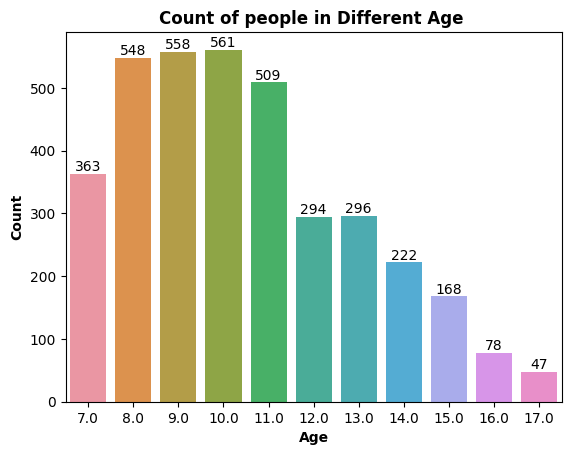

In [ ]:
fig=sns.countplot(x='Age',data=df)
for i in fig.containers:
  fig.bar_label(i)
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Count of people in Different Age ',fontweight='bold')
plt.show()

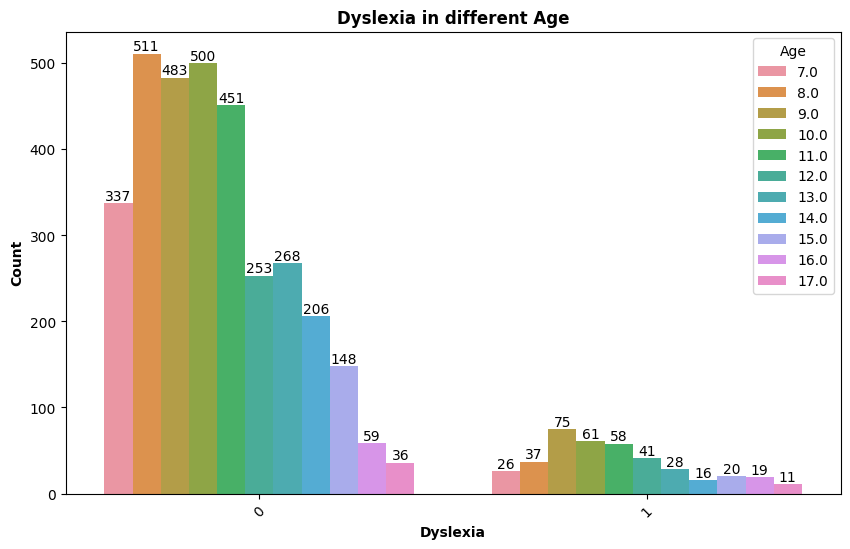

In [ ]:
plt.figure(figsize=(10,6))
fig=sns.countplot(x='Dyslexia',hue='Age',data=df)
for i in fig.containers:
  fig.bar_label(i)
plt.xlabel('Dyslexia',fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Count',fontweight='bold')
plt.title('Dyslexia in different Age',fontweight='bold')
plt.show()

In [ ]:
df['Dyslexia'].value_counts()

0    3252
1     392
Name: Dyslexia, dtype: int64

In [ ]:
df.head()

,Gender,Nativelang,Otherlang,Age,Score1,Score2,Score3,Score4,Score5,Score6,...,Score24,Score25,Score26,Score27,Score28,Score29,Score30,Score31,Score32,Dyslexia
0,1,0,1,7.0,10.0,5.0,6.0,2.0,3.0,1.0,...,2.0,3.0,3.0,1.0,2.0,1.0,1.0,0.0,2.0,0
1,2,1,1,13.0,12.0,11.0,10.0,4.0,5.0,5.0,...,2.0,5.0,8.0,2.0,2.0,0.0,2.0,4.0,2.0,1
2,2,0,1,7.0,6.0,6.0,6.0,3.0,4.0,2.0,...,3.0,4.0,2.0,2.0,3.0,0.0,1.0,4.0,1.0,0
3,2,0,1,7.0,0.0,0.0,1.0,0.0,1.0,0.0,...,3.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0
4,2,0,1,8.0,4.0,8.0,5.0,2.0,4.0,3.0,...,2.0,4.0,6.0,1.0,4.0,1.0,0.0,1.0,2.0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_test

array([[-0.99296592,  1.68705478,  0.48092539, ..., -0.43106949,
         0.72316531,  0.12514896],
       [-0.99296592, -0.59274898,  0.48092539, ..., -1.09205999,
        -0.32579461,  0.12514896],
       [-0.99296592, -0.59274898, -2.07932461, ...,  1.55190201,
        -0.32579461, -0.58719446],
       ...,
       [ 1.00708391, -0.59274898,  0.48092539, ..., -1.09205999,
        -0.32579461, -0.58719446],
       [ 1.00708391, -0.59274898,  0.48092539, ..., -0.43106949,
        -0.85027457,  0.12514896],
       [ 1.00708391,  1.68705478,  0.48092539, ...,  0.22992101,
        -0.32579461, -1.29953787]])

In [ ]:
model1=LogisticRegression()
model1.fit(x_train, y_train)

train_pred1 = model1.predict_proba(x_train)[:, 1]
print('Training Accuracy : ', (y_train, train_pred1))

y_pred1 = model1.predict(x_test)
print('Validation Accuracy : ', ras(y_test, y_pred1))

cm1=confusion_matrix(y_test,y_pred1)
cm1

Training Accuracy :  (328     0
1789    0
2498    0
367     0
3146    0
       ..
1130    0
1294    0
860     1
3507    0
3174    0
Name: Dyslexia, Length: 2550, dtype: int64, array([0.03248765, 0.357626  , 0.06633763, ..., 0.13622575, 0.14084963,
       0.26273598]))
Validation Accuracy :  0.6026854007316262


array([[958,  12],
       [ 97,  27]])

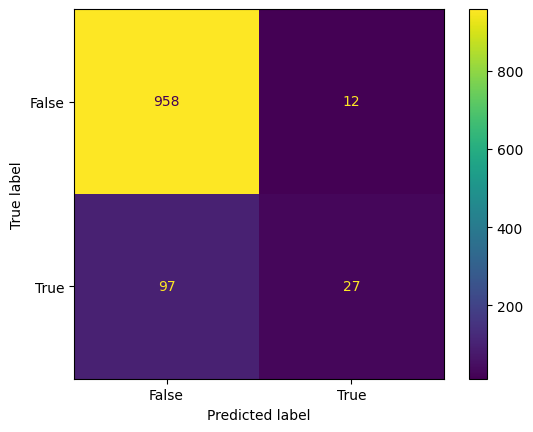

In [ ]:
cmdisplay1=ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cmdisplay1.plot()
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_score1=metrics.accuracy_score(y_test,y_pred1)
print("accuracy1=",accuracy_score1)
precision1=precision_score(y_test,y_pred1)
print("precision1=",precision1)
recall1=recall_score(y_test,y_pred1)
print("recall1=",recall1)
f1_score1=metrics.f1_score(y_test,y_pred1)
print("f1_score1=",f1_score1)
mat1=np.array([[958,    12],
       [   97,    27]])
tp1=mat1[1,1]
tn1=mat1[0,0]
sens1=tp1/(tp1+mat1[1,0])
spef1=tn1/(tn1+mat1[0,1])
gm1=np.sqrt(sens1*spef1)
print("g-mean1=",gm1)

accuracy1= 0.9003656307129799
precision1= 0.6923076923076923
recall1= 0.21774193548387097
f1_score1= 0.33128834355828224
g-mean1= 0.4637329197049646


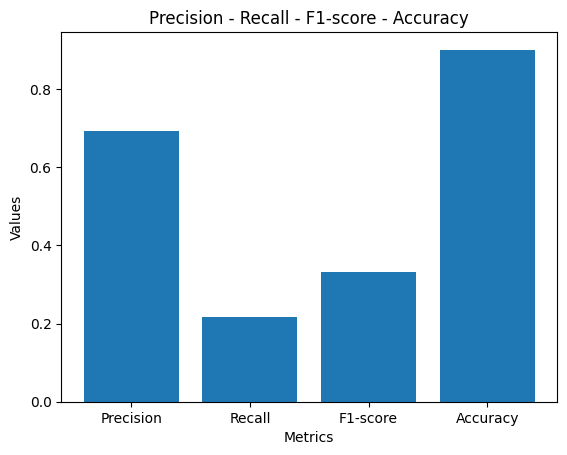

In [ ]:
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
values = [precision1, recall1, f1_score1, accuracy_score1]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Precision - Recall - F1-score - Accuracy')

plt.show()

In [ ]:
roc_AUC_score = roc_auc_score(y_test,model1.predict_proba(x_test)[:,-1])
print('ROC AUC Score : ', roc_AUC_score)

ROC AUC Score :  0.844271699368141


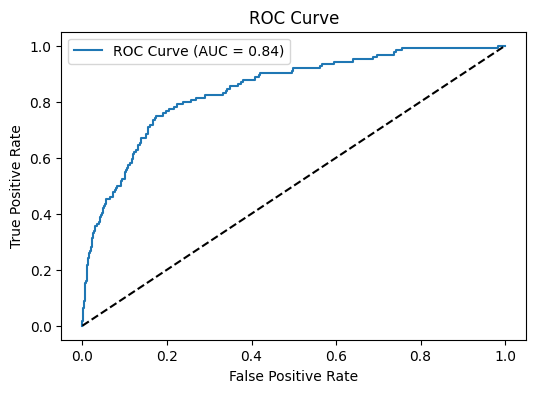

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(x_test)[:,1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_AUC_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=7)
model2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7)

In [ ]:
train_pred2 = model2.predict_proba(x_train)[:, 1]
print('Training Accuracy : ', ras(y_train, train_pred2))
y_pred2 = model2.predict(x_test)
print('Validation Accuracy : ', ras(y_test, y_pred2))
cm2=confusion_matrix(y_test,y_pred2)
cm2

Training Accuracy :  0.9991808050021583
Validation Accuracy :  0.553782840039907


array([[957,  13],
       [109,  15]])

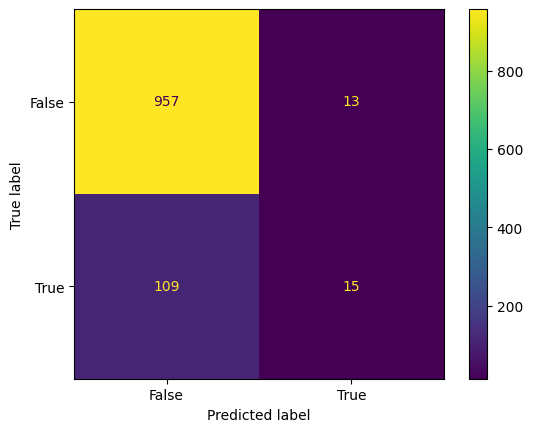

In [ ]:
cmdisplay2=ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = [False, True])
cmdisplay2.plot()
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_score2=metrics.accuracy_score(y_test,y_pred2)
print("accuracy2=",accuracy_score2)
precision2=precision_score(y_test,y_pred2)
print("precision2=",precision2)
recall2=recall_score(y_test,y_pred2)
print("recall2=",recall2)
f1_score2=metrics.f1_score(y_test,y_pred2)
print("f1_score2=",f1_score2)
mat2=np.array([[957,     13],
       [    109,    15]])
tp2=mat2[1,1]
tn2=mat2[0,0]
sens2=tp2/(tp2+mat2[1,0])
spef2=tn2/(tn2+mat2[0,1])
gm2=np.sqrt(sens2*spef2)
print("g-mean2=",gm2)

accuracy2= 0.8884826325411335
precision2= 0.5357142857142857
recall2= 0.12096774193548387
f1_score2= 0.19736842105263158
g-mean2= 0.3454656636708253


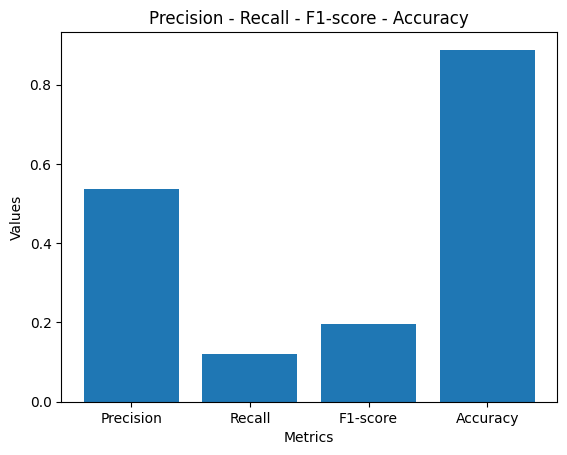

In [ ]:
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
values = [precision2, recall2, f1_score2, accuracy_score2]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Precision - Recall - F1-score - Accuracy')

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
train_pred3 = model3.predict_proba(x_train)[:, 1]
print('Training Accuracy : ', ras(y_train, train_pred3))

y_pred3 = model3.predict(x_test)
print('Validation Accuracy : ', ras(y_test, y_pred3))

cm3=confusion_matrix(y_test,y_pred3)
cm3

Training Accuracy :  1.0
Validation Accuracy :  0.5880362487529098


array([[867, 103],
       [ 89,  35]])

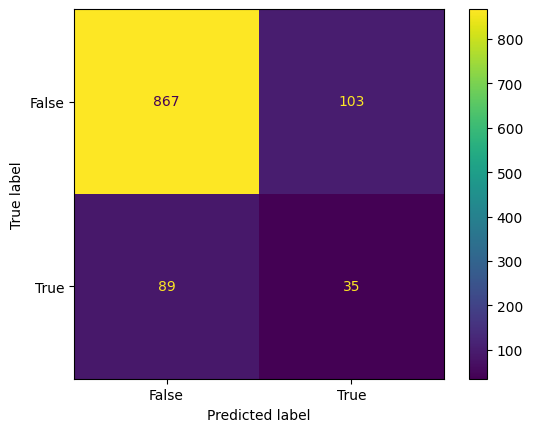

In [ ]:
cmdisplay3=ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = [False, True])
cmdisplay3.plot()
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_score3=metrics.accuracy_score(y_test,y_pred3)
print("accuracy3=",accuracy_score3)
precision3=precision_score(y_test,y_pred3)
print("precision3=",precision3)
recall3=recall_score(y_test,y_pred3)
print("recall3=",recall3)
f1_score3=metrics.f1_score(y_test,y_pred3)
print("f1_score3=",f1_score3)
mat3=np.array([[874,     96],
       [    89,    35]])
tp3=mat3[1,1]
tn3=mat3[0,0]
sens3=tp3/(tp3+mat3[1,0])
spef3=tn3/(tn3+mat3[0,1])
gm3=np.sqrt(sens3*spef3)
print("g-mean3=",gm3)

accuracy3= 0.8244972577696527
precision3= 0.2536231884057971
recall3= 0.28225806451612906
f1_score3= 0.267175572519084
g-mean3= 0.504304715187052


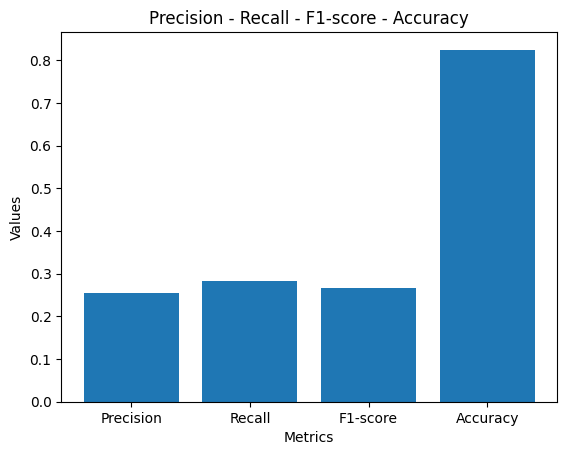

In [ ]:
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
values = [precision3, recall3, f1_score3, accuracy_score3]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Precision - Recall - F1-score - Accuracy')

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model4=KNeighborsClassifier()
model4.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
train_pred4= model4.predict_proba(x_train)[:, 1]
print('Training Accuracy : ', ras(y_train, train_pred4))

y_pred4= model4.predict(x_test)
print('Validation Accuracy : ', ras(y_test, y_pred4))

cm4=confusion_matrix(y_test,y_pred4)
cm4

Training Accuracy :  0.9195643713945609
Validation Accuracy :  0.5667276355171267


array([[943,  27],
       [104,  20]])

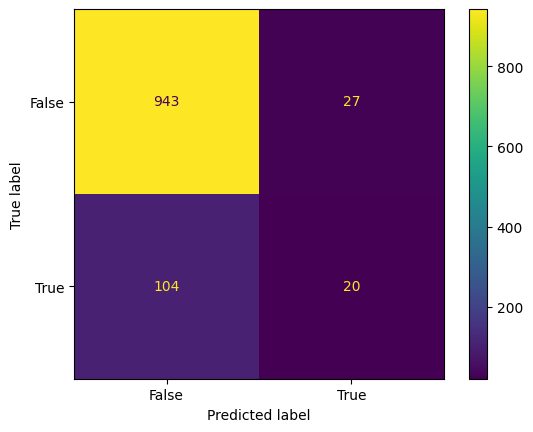

In [ ]:
cmdisplay4=ConfusionMatrixDisplay(confusion_matrix = cm4, display_labels = [False, True])
cmdisplay4.plot()
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_score4=metrics.accuracy_score(y_test,y_pred4)
print("accuracy4=",accuracy_score4)
precision4=precision_score(y_test,y_pred4)
print("precision4=",precision4)
recall4=recall_score(y_test,y_pred4)
print("recall4=",recall4)
f1_score4=metrics.f1_score(y_test,y_pred4)
print("f1_score4=",f1_score4)
mat4=np.array([[943,     27],
       [    104,    20]])
tp4=mat4[1,1]
tn4=mat4[0,0]
sens4=tp4/(tp4+mat4[1,0])
spef4=tn4/(tn4+mat4[0,1])
gm4=np.sqrt(sens4*spef4)
print("g-mean4=",gm4)

accuracy4= 0.8802559414990859
precision4= 0.425531914893617
recall4= 0.16129032258064516
f1_score4= 0.23391812865497078
g-mean4= 0.395980805264193


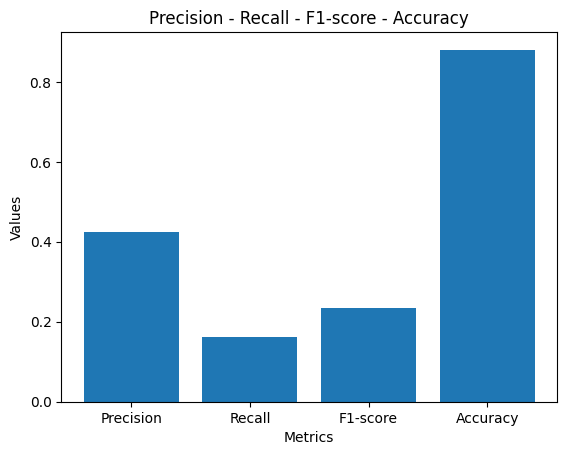

In [ ]:
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
values = [precision4, recall4, f1_score4, accuracy_score4]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Precision - Recall - F1-score - Accuracy')

plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

model5=GaussianNB()
model5.fit(x_train,y_train)

GaussianNB()

In [ ]:
train_pred5= model5.predict_proba(x_train)[:, 1]
print('Training Accuracy : ', ras(y_train, train_pred5))
y_pred5 = model5.predict(x_test)
print('Validation Accuracy : ', ras(y_test, y_pred5))
cm5=confusion_matrix(y_test,y_pred5)
cm5

Training Accuracy :  0.7491906157206953
Validation Accuracy :  0.6582723644828734


array([[706, 264],
       [ 51,  73]])

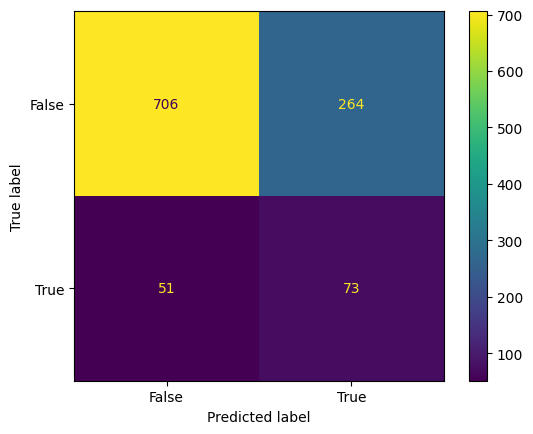

In [ ]:
cmdisplay5=ConfusionMatrixDisplay(confusion_matrix = cm5, display_labels = [False, True])
cmdisplay5.plot()

plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_score5=metrics.accuracy_score(y_test,y_pred5)
print("accuracy5=",accuracy_score5)
precision5=precision_score(y_test,y_pred5)
print("precision5=",precision5)
recall5=recall_score(y_test,y_pred5)
print("recall5=",recall5)
f1_score5=metrics.f1_score(y_test,y_pred5)
print("f1_score5=",f1_score5)
mat5=np.array([[706,     264],
       [    51,    73]])
tp5=mat5[1,1]
tn5=mat5[0,0]
sens5=tp5/(tp5+mat5[1,0])
spef5=tn5/(tn5+mat5[0,1])
gm5=np.sqrt(sens5*spef5)
print("g-mean5=",gm5)

accuracy5= 0.7120658135283364
precision5= 0.2166172106824926
recall5= 0.5887096774193549
f1_score5= 0.3167028199566161
g-mean5= 0.6545865400467502


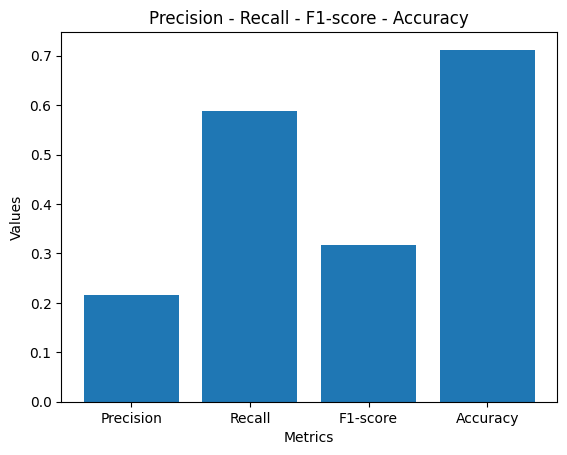

In [ ]:
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
values = [precision5, recall5, f1_score5, accuracy_score5]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Precision - Recall - F1-score - Accuracy')

plt.show()

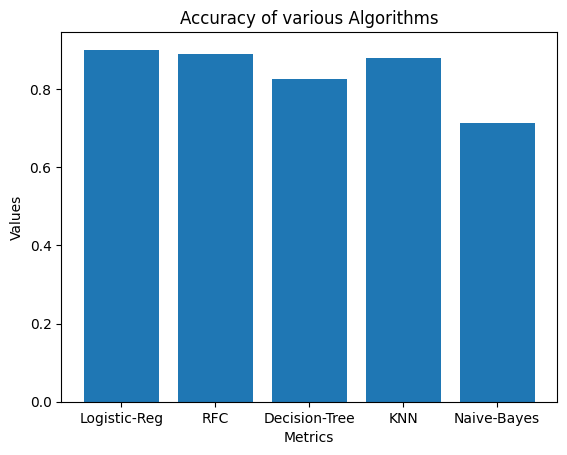

In [ ]:
metrics = ['Logistic-Reg', 'RFC', 'Decision-Tree', 'KNN', 'Naive-Bayes']
values = [accuracy_score1, accuracy_score2, accuracy_score3, accuracy_score4, accuracy_score5]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Accuracy of various Algorithms')

plt.show()